In [ ]:
!pip install CatBoost

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostRegressor

np.random.seed(42)
random.seed(42)

In [ ]:
#!pip install CatBoost

In [ ]:
real_prise = np.array([30307,30346,30069,30546,30547,30366,31460])

In [ ]:
df = pd.read_csv("/content/Bitcoin_kaggle.csv", sep = ';',parse_dates=True)
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-07-14,"30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
1,2023-07-13,"30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
2,2023-07-12,"30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
3,2023-07-11,"30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
4,2023-07-10,"30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
...,...,...,...,...,...,...,...
542,2022-01-18,"42,364.6","42,209.9","42,674.2","41,300.7",47.32K,0.37%
543,2022-01-17,"42,209.3","43,080.5","43,179.6","41,559.4",41.44K,-2.02%
544,2022-01-16,"43,079.1","43,079.2","43,462.0","42,643.3",28.66K,-0.04%
545,2022-01-15,"43,097.0","43,073.6","43,777.9","42,586.1",31.44K,0.06%


In [ ]:
Price = []
Open = []
High = []
Low = []
Change = []
for i in range(len(df)):
  Price.append(float(df.iloc[i]['Price'].replace(',', '')))
  Open.append(float(df.iloc[i]['Open'].replace(',', '')))
  High.append(float(df.iloc[i]['High'].replace(',', '')))
  Low.append(float(df.iloc[i]['Low'].replace(',', '')))
  Change.append(float(df.iloc[i]['Change %'].replace('%', '')))
Vol_1 = []
for i in range(len(df)):
  if 'K' in df.iloc[i]['Vol.']:
    Vol_1.append( float(df.iloc[i]['Vol.'].split('K')[0])*1000 )
  elif 'M' in df.iloc[i]['Vol.']:
    Vol_1.append(float(df.iloc[i]['Vol.'].split('M')[0])*1000000)
  elif 'B' in df.iloc[i]['Vol.']:
    Vol_1.append(float(df.iloc[i]['Vol.'].split('B')[0])*000000000)
  else:
    print(Vol[i])
df['Price'] = Price
df['Open'] = Open
df['High'] = High
df['Low'] = Low
df['Change %'] = Change
df['Vol.'] = Vol_1

In [ ]:
#df =df.drop(columns = ['Vol.'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      547 non-null    datetime64[ns]
 1   Price     547 non-null    float64       
 2   Open      547 non-null    float64       
 3   High      547 non-null    float64       
 4   Low       547 non-null    float64       
 5   Vol.      547 non-null    float64       
 6   Change %  547 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 30.0 KB


In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-07-14,30346.4,29912.7,30442.0,29757.4,46420.0,1.45
1,2023-07-13,30346.4,29912.7,30442.0,29757.4,46420.0,1.45
2,2023-07-12,30346.4,29912.7,30442.0,29757.4,46420.0,1.45
3,2023-07-11,30346.4,29912.7,30442.0,29757.4,46420.0,1.45
4,2023-07-10,30346.4,29912.7,30442.0,29757.4,46420.0,1.45
...,...,...,...,...,...,...,...
542,2022-01-18,42364.6,42209.9,42674.2,41300.7,47320.0,0.37
543,2022-01-17,42209.3,43080.5,43179.6,41559.4,41440.0,-2.02
544,2022-01-16,43079.1,43079.2,43462.0,42643.3,28660.0,-0.04
545,2022-01-15,43097.0,43073.6,43777.9,42586.1,31440.0,0.06


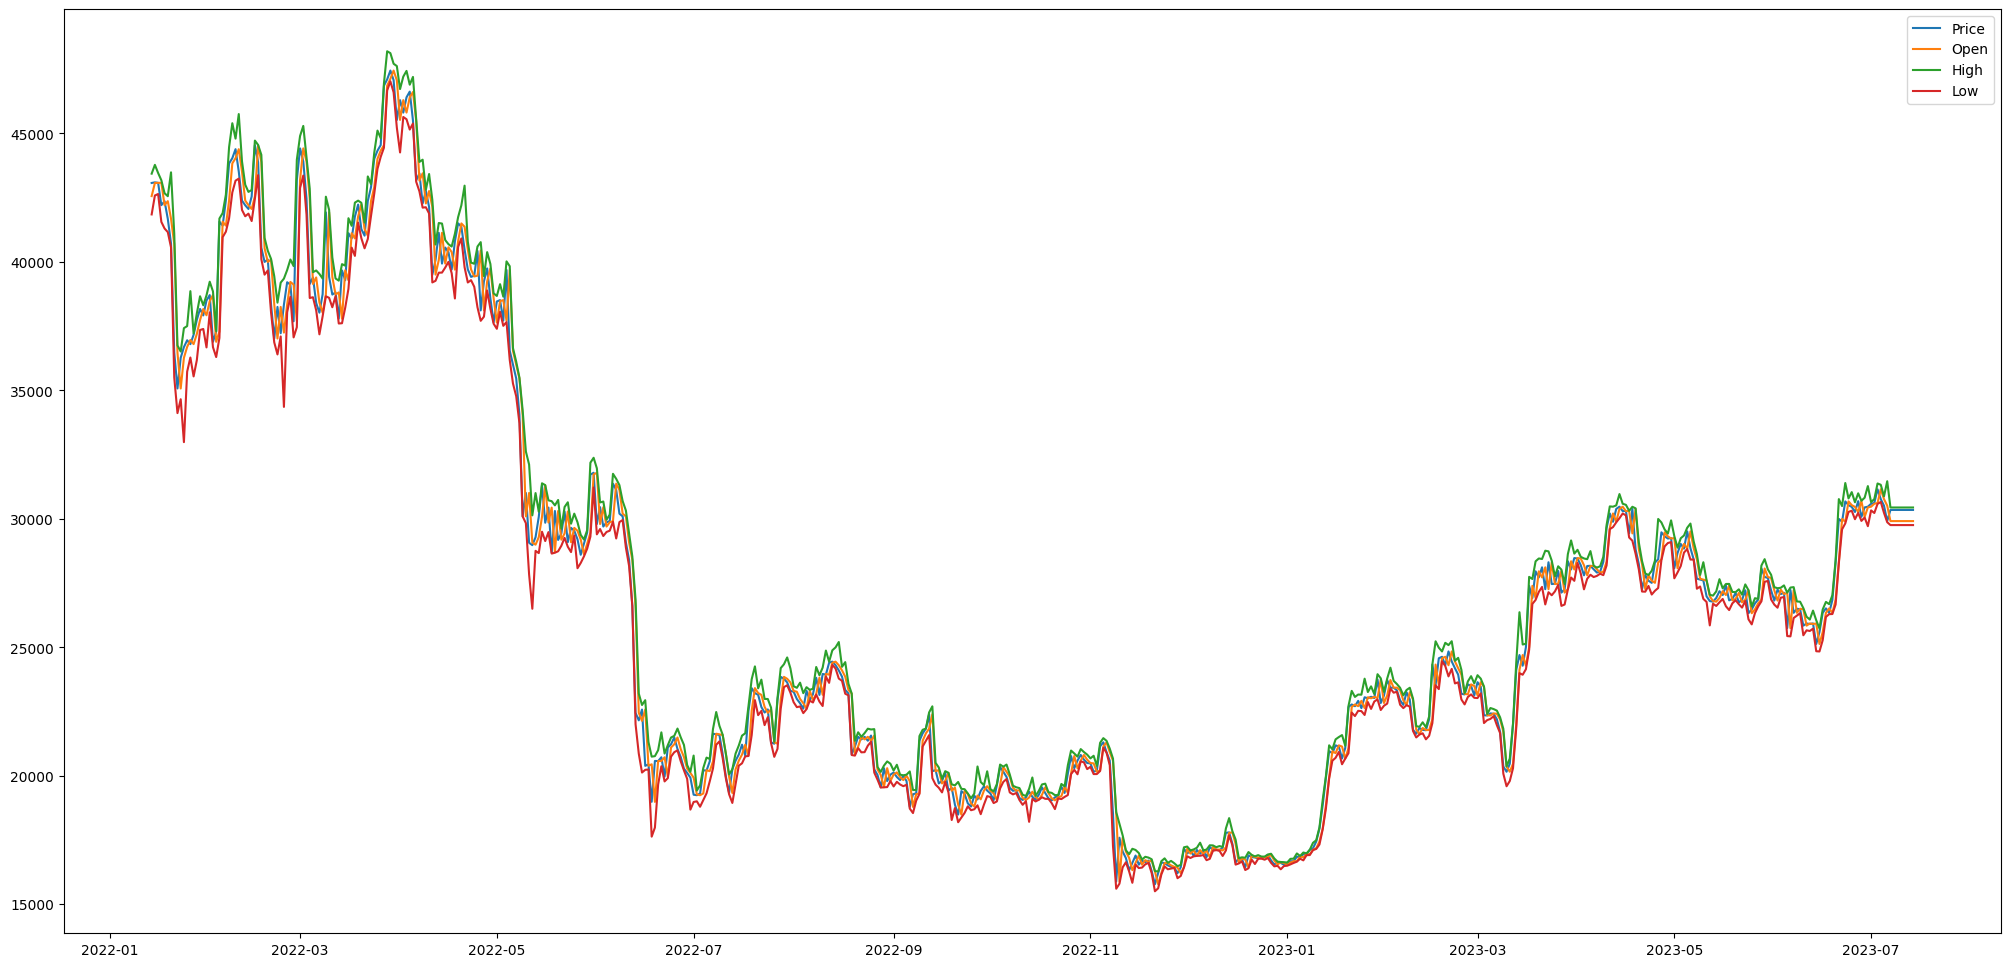

In [ ]:
x = df['Date']
y_1 = df['Price']
y_2 = df['Open']
y_3 = df['High']
y_4 = df['Low']
plt.subplots(figsize=(25, 12))
plt.plot(x, y_1, label = "Price")
plt.plot(x, y_2, label = "Open")
plt.plot(x, y_3, label = "High")
plt.plot(x, y_4, label = "Low")
plt.legend()
plt.show()

In [ ]:
df.index = df['Date']
df = df.sort_index()
df = df.drop(columns = ['Date'])
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-01-14,43073.3,42562.2,43435.1,41848.7,50500.0,1.21
2022-01-15,43097.0,43073.6,43777.9,42586.1,31440.0,0.06
2022-01-16,43079.1,43079.2,43462.0,42643.3,28660.0,-0.04
2022-01-17,42209.3,43080.5,43179.6,41559.4,41440.0,-2.02
2022-01-18,42364.6,42209.9,42674.2,41300.7,47320.0,0.37
...,...,...,...,...,...,...
2023-07-10,30346.4,29912.7,30442.0,29757.4,46420.0,1.45
2023-07-11,30346.4,29912.7,30442.0,29757.4,46420.0,1.45
2023-07-12,30346.4,29912.7,30442.0,29757.4,46420.0,1.45


новое-старое/старое

In [ ]:
(42209.3-43079.1)/(43079.1)

-0.020190765359536195

In [ ]:
def preprocess_data(data, lag_start=1, lag_end=8, test_size=0.02, terget = 'Price'):

    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    date_cut = int(len(data) * (1 - test_size))


    data = pd.DataFrame(data.copy())

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f"lag_{i}_{terget}"] = data[terget].shift(i)
        data[f"lag_{i}_Price"] = data['Price'].shift(i)
        data[f"lag_{i}_High"] = data['High'].shift(i)
        data[f"lag_{i}_Low"] = data['Low'].shift(i)
        data[f"lag_{i}_Open"] = data['Open'].shift(i)
    data = data.dropna()

    # дата
    d = pd.to_datetime(data.index)
    data['Day'] = np.array(d.strftime("%d")).astype(int)
    data['Month'] = np.array(d.strftime("%m")).astype(int)
    data['Year'] = np.array(d.strftime("%Y")).astype(int)

    # Moving averages - different periods
    data['MA200'] = data[terget].rolling(window=200).mean()
    data['MA100'] = data[terget].rolling(window=100).mean()
    data['MA50'] = data[terget].rolling(window=50).mean()
    data['MA26'] = data[terget].rolling(window=26).mean()
    data['MA20'] = data[terget].rolling(window=20).mean()
    data['MA12'] = data[terget].rolling(window=12).mean()


    # SMA Differences - different periods
    data['DIFF-MA200-MA50'] = data['MA200'] - data['MA50']
    data['DIFF-MA200-MA100'] = data['MA200'] - data['MA100']
    data['DIFF-MA200-CLOSE'] = data['MA200'] - data[terget]
    data['DIFF-MA100-CLOSE'] = data['MA100'] - data[terget]
    data['DIFF-MA50-CLOSE'] = data['MA50'] - data[terget]

    # Moving Averages on high, lows, and std - different periods
    data['MA200_low'] = data['Low'].rolling(window=200).min()
    data['MA14_low'] = data['Low'].rolling(window=14).min()
    data['MA200_high'] = data['High'].rolling(window=200).max()
    data['MA14_high'] = data['High'].rolling(window=14).max()
    data['MA20dSTD'] = data[terget].rolling(window=20).std()


    # Exponential Moving Averages (EMAS) - different periods
    data['EMA12'] = data[terget].ewm(span=12, adjust=False).mean()
    data['EMA20'] = data[terget].ewm(span=20, adjust=False).mean()
    data['EMA26'] = data[terget].ewm(span=26, adjust=False).mean()
    data['EMA100'] = data[terget].ewm(span=100, adjust=False).mean()
    data['EMA200'] = data[terget].ewm(span=200, adjust=False).mean()


    # Shifts (one day before and two days before)
    #data['close_shift-1'] = data.iloc[:date_cut].shift(-1)[terget]
    #data['close_shift-2'] = data.iloc[:date_cut].shift(-2)[terget]

    # Bollinger Bands

    # Relative Strength Index (RSI)
    data['K-ratio'] = 100*((data[terget] - data['MA14_low']) / (data['MA14_high'] - data['MA14_low']) )
    data['RSI'] = data['K-ratio'].rolling(window=3).mean()

    # Moving Average Convergence/Divergence (MACD)
    data['MACD'] = data['EMA12'] - data['EMA26']

    # Replace nas
    nareplace = data.at[data.index.max(), terget]
    data.fillna((nareplace), inplace=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.iloc[:date_cut].drop([terget], axis=1)
    y_train = data.iloc[:date_cut][terget]
    X_test = data.iloc[date_cut:].drop([terget], axis=1)
    y_test = data.iloc[date_cut:][terget]

    return X_train, X_test, y_train, y_test

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
date_array = ['2023-07-08',
'2023-07-09',
'2023-07-10',
'2023-07-11',
'2023-07-12',
'2023-07-13',
'2023-07-14']

In [ ]:
for i in date_array:
  new_df = df.loc[:i]
  X_train_Prise, X_test_Prise, y_train_Prise, y_test_Prise = preprocess_data(new_df, lag_start=1, lag_end=15, test_size=0.038,terget = 'Price')

  lr_Prise = LinearRegression()
  lr_Prise.fit(X_train_Prise, y_train_Prise)
  preds_Prise = lr_Prise.predict(X_test_Prise)
  ##############################################
  X_train_Open, X_test_Open, y_train_Open, y_test_Open = preprocess_data(new_df, lag_start=1, lag_end=15, test_size=0.038,terget = 'Open')

  lr_Open = LinearRegression()
  lr_Open.fit(X_train_Open, y_train_Open)
  preds_Open = lr_Open.predict(X_test_Open)
  ##############################################
  X_train_High, X_test_High, y_train_High, y_test_High = preprocess_data(new_df, lag_start=1, lag_end=15, test_size=0.038,terget = 'High')

  lr_High = LinearRegression()
  lr_High.fit(X_train_High, y_train_High)
  preds_High = lr_High.predict(X_test_High)
  ##############################################
  X_train_Low, X_test_Low, y_train_Low, y_test_Low = preprocess_data(new_df, lag_start=1, lag_end=15, test_size=0.038,terget = 'Low')

  lr_Low = LinearRegression()
  lr_Low.fit(X_train_Low, y_train_Low)
  preds_Low = lr_Low.predict(X_test_Low)
  ##############################################
  X_train_Vol, X_test_Vol, y_train_Vol, y_test_Vol = preprocess_data(new_df, lag_start=1, lag_end=15, test_size=0.038,terget = 'Vol.')

  lr_Vol = LinearRegression()
  lr_Vol.fit(X_train_Vol, y_train_Vol)
  preds_Vol = lr_Vol.predict(X_test_Vol)
  ##############################################
  preds_Change = (preds_Prise[0] - new_df.iloc[-1]['Price'])/new_df.iloc[-1]['Price'] #новое-старое/старое
  ##############################################
  df.loc[i] = [preds_Prise[0], preds_Open[0], preds_High[0], preds_Low[0], preds_Vol[0],preds_Change]

In [ ]:
np.array(df.Price)[-7:]

array([30610.42223079, 31163.2686806 , 30764.73537295, 30524.18509474,
       29931.65949138, 30380.23731027, 30701.93625587])

In [ ]:
preds = np.array(df.Price)[-7:]
plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(real_prise, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, real_prise)}");

In [ ]:
for i in date_array:
  print(df.loc[i])

Price         30346.40
Open          29912.70
High          30442.00
Low           29757.40
Vol.        4642000.00
Change %          1.45
Name: 2023-07-08 00:00:00, dtype: float64
Price         30346.40
Open          29912.70
High          30442.00
Low           29757.40
Vol.        4642000.00
Change %          1.45
Name: 2023-07-09 00:00:00, dtype: float64
Price         30346.40
Open          29912.70
High          30442.00
Low           29757.40
Vol.        4642000.00
Change %          1.45
Name: 2023-07-10 00:00:00, dtype: float64
Price         30346.40
Open          29912.70
High          30442.00
Low           29757.40
Vol.        4642000.00
Change %          1.45
Name: 2023-07-11 00:00:00, dtype: float64
Price         30346.40
Open          29912.70
High          30442.00
Low           29757.40
Vol.        4642000.00
Change %          1.45
Name: 2023-07-12 00:00:00, dtype: float64
Price         30346.40
Open          29912.70
High          30442.00
Low           29757.40
Vol.    

In [ ]:
for ii in date_array:
  new_df = df.loc[:ii]
  X_train_Prise, X_test_Prise, y_train_Prise, y_test_Prise = preprocess_data(new_df, lag_start=1, lag_end=15, test_size=0.038,terget = 'Price')


  scaler = MinMaxScaler(feature_range=(0,1))
  scaler_y = MinMaxScaler(feature_range=(0,1))
  X_train_scal = scaler.fit_transform(np.array(X_train_Prise))
  X_test_scal = scaler.transform(np.array(X_test_Prise))
  y_train_scal = scaler_y.fit_transform(np.array(y_train_Prise).reshape(-1, 1))
  y_test_scal =scaler_y.transform(np.array(y_test_Prise).reshape(-1, 1))

  my_model = CatBoostRegressor(
        eval_metric='RMSE',
        iterations=1000,
        learning_rate=0.05
    )
  my_model.fit(X_train_scal, y_train_scal, verbose=False)

  preds_scal = my_model.predict(X_test_scal)
  preds_cat = scaler_y.inverse_transform(preds_scal.reshape(-1, 1))
  preds_CAT = []
  for i in preds_cat:
    preds_CAT.append(i[0])

  lr = LinearRegression()
  lr.fit(X_train_Prise, y_train_Prise)

  preds_lr = lr.predict(X_test_Prise)

  preds_Prise = preds_lr*0.5+np.array(preds_CAT)*0.5
  ##############################################
  X_train_Open, X_test_Open, y_train_Open, y_test_Open = preprocess_data(new_df, lag_start=1, lag_end=15, test_size=0.038,terget = 'Open')


  scaler = MinMaxScaler(feature_range=(0,1))
  scaler_y = MinMaxScaler(feature_range=(0,1))
  X_train_scal = scaler.fit_transform(np.array(X_train_Open))
  X_test_scal = scaler.transform(np.array(X_test_Open))
  y_train_scal = scaler_y.fit_transform(np.array(y_train_Open).reshape(-1, 1))
  y_test_scal =scaler_y.transform(np.array(y_test_Open).reshape(-1, 1))

  my_model = CatBoostRegressor(
        eval_metric='RMSE',
        iterations=1000,
        learning_rate=0.05
    )
  my_model.fit(X_train_scal, y_train_scal, verbose=False)

  preds_scal = my_model.predict(X_test_scal)
  preds_cat = scaler_y.inverse_transform(preds_scal.reshape(-1, 1))
  preds_CAT = []
  for i in preds_cat:
    preds_CAT.append(i[0])

  lr = LinearRegression()
  lr.fit(X_train_Open, y_train_Open)

  preds_lr = lr.predict(X_test_Open)
  preds_Open = preds_lr*0.5+np.array(preds_CAT)*0.5
  ##############################################
  X_train_High, X_test_High, y_train_High, y_test_High = preprocess_data(new_df, lag_start=1, lag_end=15, test_size=0.038,terget = 'High')

  scaler = MinMaxScaler(feature_range=(0,1))
  scaler_y = MinMaxScaler(feature_range=(0,1))
  X_train_scal = scaler.fit_transform(np.array(X_train_High))
  X_test_scal = scaler.transform(np.array(X_test_High))
  y_train_scal = scaler_y.fit_transform(np.array(y_train_High).reshape(-1, 1))
  y_test_scal =scaler_y.transform(np.array(y_test_High).reshape(-1, 1))

  my_model = CatBoostRegressor(
        eval_metric='RMSE',
        iterations=1000,
        learning_rate=0.05
    )
  my_model.fit(X_train_scal, y_train_scal, verbose=False)

  preds_scal = my_model.predict(X_test_scal)
  preds_cat = scaler_y.inverse_transform(preds_scal.reshape(-1, 1))
  preds_CAT = []
  for i in preds_cat:
    preds_CAT.append(i[0])

  lr = LinearRegression()
  lr.fit(X_train_High, y_train_High)

  preds_lr = lr.predict(X_test_High)
  preds_High = preds_lr*0.5+np.array(preds_CAT)*0.5
  ##############################################
  X_train_Low, X_test_Low, y_train_Low, y_test_Low = preprocess_data(new_df, lag_start=1, lag_end=15, test_size=0.038,terget = 'Low')

  scaler = MinMaxScaler(feature_range=(0,1))
  scaler_y = MinMaxScaler(feature_range=(0,1))
  X_train_scal = scaler.fit_transform(np.array(X_train_Low))
  X_test_scal = scaler.transform(np.array(X_test_Low))
  y_train_scal = scaler_y.fit_transform(np.array(y_train_Low).reshape(-1, 1))
  y_test_scal =scaler_y.transform(np.array(y_test_Low).reshape(-1, 1))

  my_model = CatBoostRegressor(
        eval_metric='RMSE',
        iterations=1000,
        learning_rate=0.05
    )
  my_model.fit(X_train_scal, y_train_scal, verbose=False)

  preds_scal = my_model.predict(X_test_scal)
  preds_cat = scaler_y.inverse_transform(preds_scal.reshape(-1, 1))
  preds_CAT = []
  for i in preds_cat:
    preds_CAT.append(i[0])

  lr = LinearRegression()
  lr.fit(X_train_Low, y_train_Low)

  preds_lr = lr.predict(X_test_Low)
  preds_Low = preds_lr*0.5+np.array(preds_CAT)*0.5
  ##############################################
  X_train_Vol, X_test_Vol, y_train_Vol, y_test_Vol = preprocess_data(new_df, lag_start=1, lag_end=15, test_size=0.038,terget = 'Vol.')


  scaler = MinMaxScaler(feature_range=(0,1))
  scaler_y = MinMaxScaler(feature_range=(0,1))
  X_train_scal = scaler.fit_transform(np.array(X_train_Vol))
  X_test_scal = scaler.transform(np.array(X_test_Vol))
  y_train_scal = scaler_y.fit_transform(np.array(y_train_Vol).reshape(-1, 1))
  y_test_scal =scaler_y.transform(np.array(y_test_Vol).reshape(-1, 1))

  my_model = CatBoostRegressor(
        eval_metric='RMSE',
        iterations=1000,
        learning_rate=0.05
    )
  my_model.fit(X_train_scal, y_train_scal, verbose=False)

  preds_scal = my_model.predict(X_test_scal)
  preds_cat = scaler_y.inverse_transform(preds_scal.reshape(-1, 1))
  preds_CAT = []
  for i in preds_cat:
    preds_CAT.append(i[0])

  lr = LinearRegression()
  lr.fit(X_train_Vol, y_train_Vol)

  preds_lr = lr.predict(X_test_Vol)
  preds_Vol = preds_lr*0.5+np.array(preds_CAT)*0.5
  ##############################################
  preds_Change = (preds_Prise[0] - new_df.iloc[-1]['Price'])/new_df.iloc[-1]['Price'] #новое-старое/старое
  ##############################################
  print([preds_Prise[0], preds_Open[0], preds_High[0], preds_Low[0], preds_Vol[0],preds_Change])
  df.loc[ii] = [preds_Prise[0], preds_Open[0], preds_High[0], preds_Low[0], preds_Vol[0],preds_Change]

[30543.99529045395, 30688.080367327137, 30728.487056469447, 30323.673797112962, 242757.6582120455, 0.0065113255758161796]
[31006.685326304494, 30632.962861981716, 31275.098238053375, 30531.98538583805, -148280.5012179572, 0.02175827532440397]
[30712.032859082887, 31101.601321438124, 31400.183413766306, 30645.35552431383, -1737.421323036826, 0.012048640335686778]
[30477.10168062434, 30521.712621375835, 30983.058986205328, 30037.96691718293, 177387.5791624248, 0.004306991294662211]
[29527.297615202144, 30422.751399375862, 31765.985278670647, 29418.162758782393, -143305.70165388857, -0.026991748108436506]
[30555.728385503156, 29919.56626142295, 30389.97887634415, 29530.972885199397, -38209.24461233531, 0.006897964355019211]
[30688.999567629966, 30604.001288395233, 31765.91222369454, 30615.13030975894, 1789172.047272564, 0.01128962801617208]


In [ ]:
np.array(df.Price)[-7:]

array([30543.99529045, 31006.6853263 , 30712.03285908, 30477.10168062,
       29527.2976152 , 30555.7283855 , 30688.99956763])

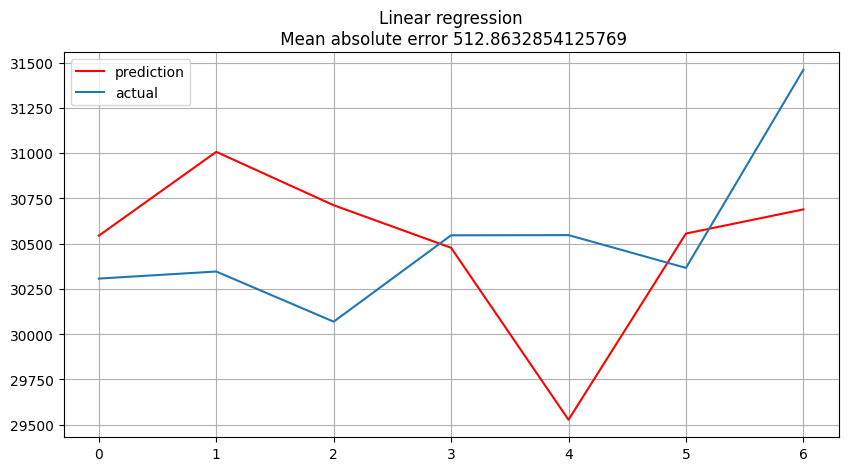

In [ ]:
preds = np.array(df.Price)[-7:]
plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(real_prise, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, real_prise)}");

In [ ]:
X_train, X_test, y_train, y_test = preprocess_data(df, lag_start=7, lag_end=15, test_size=0.038)

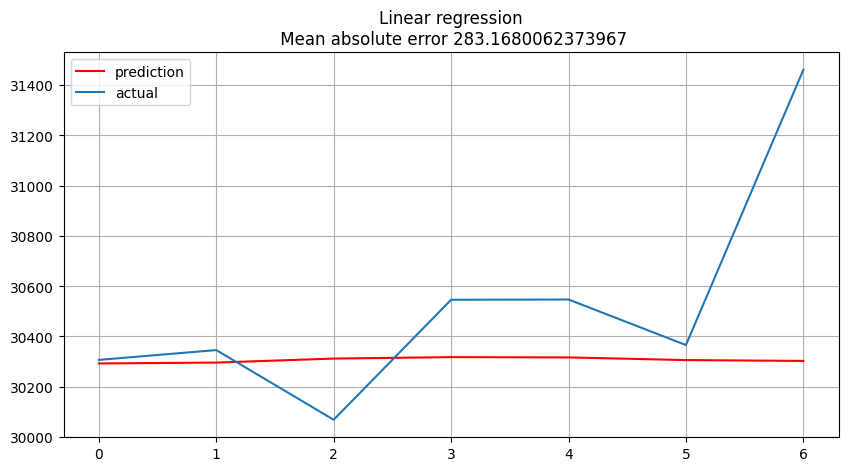

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
steps = [('scaler', StandardScaler()),
 ('Regression', LinearRegression())]
pipeline = Pipeline(steps)
lr = LinearRegression()
lr.fit(X_train, y_train)
#pipeline.fit(X_train, y_train)


preds = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(real_prise, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, real_prise)}");

In [ ]:
!pip install CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.9 MB/s eta 0:00:00


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))
X_train_scal = scaler.fit_transform(np.array(X_train))
X_test_scal = scaler.transform(np.array(X_test))
y_train_scal = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_scal =scaler_y.transform(np.array(y_test).reshape(-1, 1))

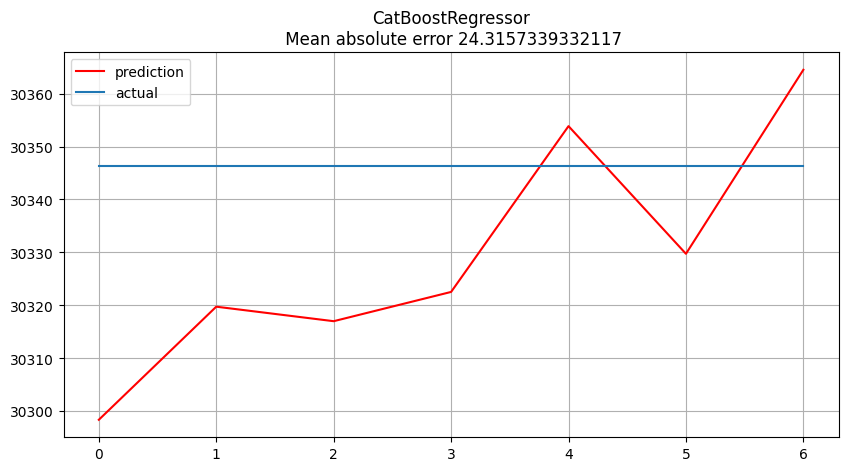

In [ ]:
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


my_model = CatBoostRegressor(
        eval_metric='RMSE',
        iterations=5000,
        learning_rate=0.05
    )
my_model.fit(X_train_scal, y_train_scal, verbose=False)

preds_scal = my_model.predict(X_test_scal)
preds_cat = scaler_y.inverse_transform(preds_scal.reshape(-1, 1))
preds_CAT = []
for i in preds_cat:
  preds_CAT.append(i[0])


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

preds_lr = lr.predict(X_test)

preds = preds_lr*0.9+np.array(preds_CAT)*0.1

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"CatBoostRegressor\n Mean absolute error {mean_absolute_error(preds, y_test)}");

In [ ]:
X_train, X_test, y_train, y_test = preprocess_data(df, lag_start=7, lag_end=15, test_size=0.038)

In [ ]:
X_test

,Open,High,Low,Vol.,Change %,lag_7Price,lag_8Price,lag_9Price,lag_10Price,lag_11Price,...,EMA12,EMA20,EMA26,EMA100,EMA200,Bollinger_Upper,Bollinger_Lower,K-ratio,RSI,MACD
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-08,30609.100563,30844.903025,30260.862565,1.170081e+06,0.009664,30586.8,30472.9,30445.7,30078.6,30689.1,...,30296.970601,29841.453541,29523.408395,27683.240374,26150.795386,32090.169279,28230.707373,52.893861,33.458474,773.562206
2023-07-09,30695.230550,31436.387751,30628.226297,3.725929e+06,0.026835,30617.7,30586.8,30472.9,30445.7,30078.6,...,30429.857754,29967.099594,29644.692002,27752.101695,26200.645552,31570.190206,29182.170156,82.684643,57.235218,785.165751
2023-07-10,31202.713214,31371.600816,30704.793416,2.741525e+06,0.013614,31151.3,30617.7,30586.8,30472.9,30445.7,...,30480.579785,30042.571152,29727.274147,27811.655146,26246.007795,31200.600261,29796.945197,59.747925,65.108810,753.305638
2023-07-11,30805.409208,30901.301081,30251.796912,3.283640e+06,0.005181,30768.4,31151.3,30617.7,30586.8,30472.9,...,30484.124748,30086.480761,29784.781399,27864.961421,26288.372116,31185.045626,29863.172037,45.115891,62.516153,699.343349
2023-07-12,30589.804843,31411.552618,29878.790986,7.741848e+06,-0.012655,30512.8,30768.4,31151.3,30617.7,30586.8,...,30403.856003,30074.661441,29797.936696,27906.494421,26324.929387,31174.769148,29880.636305,14.171740,39.678519,605.919307
2023-07-13,29984.032211,30477.137493,29801.990349,3.852077e+06,0.000999,29913.1,30512.8,30768.4,31151.3,30617.7,...,30399.682960,30103.429992,29840.810364,27955.410001,26365.245823,31158.854371,29866.284204,37.861256,32.382962,558.872596
2023-07-14,30667.562314,30947.756892,30315.973514,3.510593e+05,0.011955,30346.4,29913.1,30512.8,30768.4,31151.3,...,30447.300079,30161.121825,29905.135095,28009.940382,26408.469191,31173.580530,29869.117469,55.784447,35.939148,542.164983


In [ ]:
preds

array([30298.3637584 , 30319.73305675, 30316.99202719, 30322.52135576,
       30353.85057309, 30329.7291782 , 30364.49894075])

In [ ]:
preds

array([30292.82228402, 30296.31043001, 30312.22526562, 30317.942121  ,
       30316.81429204, 30306.31087356, 30302.84922133])

In [ ]:
X_test['Price'] = np.array(df.Price)[-7:]

In [ ]:
X_test[['Price']]

,Price
Date,
2023-07-08,30639.666527
2023-07-09,31160.737093
2023-07-10,30759.550960
2023-07-11,30503.622043
2023-07-12,29962.377906
2023-07-13,30376.731222
2023-07-14,30709.194234


In [ ]:
X_test[['Price']].to_csv("prediction_lr_po_1.csv")

# LSTM

In [ ]:
# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-07-14,30346.4,29912.7,30442.0,29757.4,46420.0,1.45
1,2023-07-13,30346.4,29912.7,30442.0,29757.4,46420.0,1.45
2,2023-07-12,30346.4,29912.7,30442.0,29757.4,46420.0,1.45
3,2023-07-11,30346.4,29912.7,30442.0,29757.4,46420.0,1.45
4,2023-07-10,30346.4,29912.7,30442.0,29757.4,46420.0,1.45
...,...,...,...,...,...,...,...
542,2022-01-18,42364.6,42209.9,42674.2,41300.7,47320.0,0.37
543,2022-01-17,42209.3,43080.5,43179.6,41559.4,41440.0,-2.02
544,2022-01-16,43079.1,43079.2,43462.0,42643.3,28660.0,-0.04
545,2022-01-15,43097.0,43073.6,43777.9,42586.1,31440.0,0.06


In [ ]:
df_1 = df[['Date','Price']].iloc[::-1]
df_1

,Date,Price
546,2022-01-14,43073.3
545,2022-01-15,43097.0
544,2022-01-16,43079.1
543,2022-01-17,42209.3
542,2022-01-18,42364.6
...,...,...
4,2023-07-10,30346.4
3,2023-07-11,30346.4
2,2023-07-12,30346.4
1,2023-07-13,30346.4


In [ ]:
def preprocess_data(data, lag_start=1, lag_end=8, terget = 'Price'):

    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    date_cut = int(len(data) * (1 - test_size))


    data = pd.DataFrame(data.copy())

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f"lag_{i}_{terget}"] = data[terget].shift(i)
        data[f"lag_{i}_Price"] = data['Price'].shift(i)
        data[f"lag_{i}_High"] = data['High'].shift(i)
        data[f"lag_{i}_Low"] = data['Low'].shift(i)
        data[f"lag_{i}_Open"] = data['Open'].shift(i)
    data = data.dropna()

    # дата
    d = pd.to_datetime(data.index)
    data['Day'] = np.array(d.strftime("%d")).astype(int)
    data['Month'] = np.array(d.strftime("%m")).astype(int)
    data['Year'] = np.array(d.strftime("%Y")).astype(int)

    # Moving averages - different periods
    data['MA200'] = data[terget].rolling(window=200).mean()
    data['MA100'] = data[terget].rolling(window=100).mean()
    data['MA50'] = data[terget].rolling(window=50).mean()
    data['MA26'] = data[terget].rolling(window=26).mean()
    data['MA20'] = data[terget].rolling(window=20).mean()
    data['MA12'] = data[terget].rolling(window=12).mean()


    # SMA Differences - different periods
    data['DIFF-MA200-MA50'] = data['MA200'] - data['MA50']
    data['DIFF-MA200-MA100'] = data['MA200'] - data['MA100']
    data['DIFF-MA200-CLOSE'] = data['MA200'] - data[terget]
    data['DIFF-MA100-CLOSE'] = data['MA100'] - data[terget]
    data['DIFF-MA50-CLOSE'] = data['MA50'] - data[terget]

    # Moving Averages on high, lows, and std - different periods
    data['MA200_low'] = data['Low'].rolling(window=200).min()
    data['MA14_low'] = data['Low'].rolling(window=14).min()
    data['MA200_high'] = data['High'].rolling(window=200).max()
    data['MA14_high'] = data['High'].rolling(window=14).max()
    data['MA20dSTD'] = data[terget].rolling(window=20).std()


    # Exponential Moving Averages (EMAS) - different periods
    data['EMA12'] = data[terget].ewm(span=12, adjust=False).mean()
    data['EMA20'] = data[terget].ewm(span=20, adjust=False).mean()
    data['EMA26'] = data[terget].ewm(span=26, adjust=False).mean()
    data['EMA100'] = data[terget].ewm(span=100, adjust=False).mean()
    data['EMA200'] = data[terget].ewm(span=200, adjust=False).mean()


    # Shifts (one day before and two days before)
    #data['close_shift-1'] = data.iloc[:date_cut].shift(-1)[terget]
    #data['close_shift-2'] = data.iloc[:date_cut].shift(-2)[terget]

    # Bollinger Bands

    # Relative Strength Index (RSI)
    data['K-ratio'] = 100*((data[terget] - data['MA14_low']) / (data['MA14_high'] - data['MA14_low']) )
    data['RSI'] = data['K-ratio'].rolling(window=3).mean()

    # Moving Average Convergence/Divergence (MACD)
    data['MACD'] = data['EMA12'] - data['EMA26']

    # Replace nas
    nareplace = data.at[data.index.max(), terget]
    data.fillna((nareplace), inplace=True)

    return data

In [ ]:
df_1 = preprocess_data(df, lag_start=1, lag_end=8, terget = 'Price')
df_1

,Date,Price,Open,High,Low,Vol.,Change %,lag_1_Price,lag_1_High,lag_1_Low,...,MA14_high,MA20dSTD,EMA12,EMA20,EMA26,EMA100,EMA200,K-ratio,RSI,MACD
7,2023-07-07,30346.4,29912.7,30442.0,29757.4,46420.0,1.45,30346.4,30442.0,29757.4,...,43073.3,43073.300000,30346.400000,30346.400000,30346.400000,30346.400000,30346.400000,43073.300000,43073.300000,0.000000
8,2023-07-06,29913.1,30512.8,31463.6,29869.0,90810.0,-1.97,30346.4,30442.0,29757.4,...,43073.3,43073.300000,30279.738462,30305.133333,30314.303704,30337.819802,30342.088557,43073.300000,43073.300000,-34.565242
9,2023-07-05,30512.8,30768.6,30875.6,30233.3,43230.0,-0.83,29913.1,31463.6,29869.0,...,43073.3,43073.300000,30315.594083,30324.911111,30329.007133,30341.284756,30343.787179,43073.300000,43073.300000,-13.413050
10,2023-07-04,30768.4,31152.0,31326.5,30657.8,42120.0,-1.23,30512.8,30875.6,30233.3,...,43073.3,43073.300000,30385.256532,30367.148148,30361.554753,30349.742484,30348.012182,43073.300000,43073.300000,23.701779
11,2023-07-03,31151.3,30617.5,31377.0,30581.5,56490.0,1.74,30768.4,31326.5,30657.8,...,43073.3,43073.300000,30503.109373,30441.829277,30420.054401,30365.614910,30356.005095,43073.300000,43073.300000,83.054972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,2022-01-18,42364.6,42209.9,42674.2,41300.7,47320.0,0.37,41677.8,42558.0,41160.9,...,43487.1,2285.442874,39005.882473,39060.433480,39232.827971,38689.569386,34984.664073,89.311051,81.897824,-226.945498
543,2022-01-17,42209.3,43080.5,43179.6,41559.4,41440.0,-2.02,42364.6,42674.2,41300.7,...,43487.1,2269.521913,39498.715939,39360.325529,39453.307381,38759.267022,35056.550998,87.832214,86.638099,45.408558
544,2022-01-16,43079.1,43079.2,43462.0,42643.3,28660.0,-0.04,42209.3,43179.6,41559.4,...,43487.1,2407.385174,40049.544256,39714.494527,39721.884612,38844.808269,35136.377356,96.114841,91.086035,327.659644
545,2022-01-15,43097.0,43073.6,43777.9,42586.1,31440.0,0.06,43079.1,43462.0,42643.3,...,43777.9,2527.478643,40518.383601,40036.637905,39971.893159,38929.010086,35215.587531,93.690872,92.545976,546.490442


In [ ]:
del df_1['Date']
scaler=MinMaxScaler(feature_range=(0,1))
new_df=scaler.fit_transform(np.array(df_1))
print(new_df.shape)

(540, 61)


In [ ]:
training_size=int(len(new_df)*0.70)
test_size=len(new_df)-training_size
train_data,test_data=new_df[0:training_size,:],new_df[training_size:len(new_df),:]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (378, 61)
test_data:  (162, 61)


In [ ]:
train_data

array([[4.60022480e-01, 4.46322350e-01, 4.43779679e-01, ...,
        1.00000000e+00, 1.00000000e+00, 4.16710563e-01],
       [4.46341972e-01, 4.65269446e-01, 4.75780281e-01, ...,
        1.00000000e+00, 1.00000000e+00, 4.09190735e-01],
       [4.65276199e-01, 4.73345878e-01, 4.57361767e-01, ...,
        1.00000000e+00, 1.00000000e+00, 4.13792492e-01],
       ...,
       [1.56411811e-01, 1.66109925e-01, 1.63602135e-01, ...,
        1.23759296e-03, 9.94517788e-04, 3.07931719e-01],
       [1.66303579e-01, 1.80387340e-01, 1.74249164e-01, ...,
        1.42903756e-03, 1.18439874e-03, 3.29215207e-01],
       [1.80397691e-01, 1.72083581e-01, 1.65353147e-01, ...,
        1.70181403e-03, 1.43125212e-03, 3.54634578e-01]])

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (356, 25, 1)
X_test:  (139, 25, 1)


In [ ]:
model=Sequential()

n_neurons = X_train.shape[1] * X_train.shape[2]
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(Dropout(0.1))
model.add(LSTM(n_neurons, return_sequences=True))
#model.add(Dropout(0.1))
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1, activation='relu'))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 25, 25)            2700      
                                                                 
 lstm_12 (LSTM)              (None, 25, 25)            5100      
                                                                 
 lstm_13 (LSTM)              (None, 25)                5100      
                                                                 
 dense_8 (Dense)             (None, 32)                832       
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,765
Trainable params: 13,765
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
11/11 [==============================] - 1165s 106s/step - loss: 52.6505 - val_loss: 0.6362
Epoch 2/200
11/11 [==============================] - 1168s 107s/step - loss: 0.0516 - val_loss: 0.6362
Epoch 3/200
11/11 [==============================] - 1111s 101s/step - loss: 0.0516 - val_loss: 0.6362
Epoch 4/200
 1/11 [=>............................] - ETA: 15:17 - loss: 0.0740

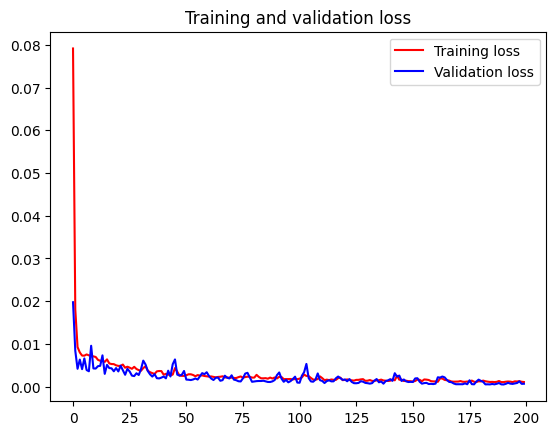

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 11ms/step


((356, 1), (139, 1))

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data MAE:  887.5269311797754
-------------------------------------------------------------------------------------
Test data MAE:  633.3403158723022


In [ ]:
X_train, X_test, y_train, y_test = preprocess_data(new_df, lag_start=1, lag_end=15, test_size=0.038,terget = 'Price')

KeyError: ignored

In [ ]:
X_test_scal = scaler.transform(np.array(X_test))

In [ ]:
X_test = np.array(X_test_scal).reshape(X_test_scal.shape[0],X_test_scal.shape[1] , 1)

In [ ]:
test_predict=model.predict(X_test)
test_predict.shape

1/1 [==============================] - 1s 1s/step


(7, 1)

In [ ]:
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
test_predict

array([[24782.273],
       [25005.371],
       [25053.26 ],
       [25062.361],
       [24893.19 ],
       [24900.742],
       [24877.11 ]], dtype=float32)